# Cart Pole

## Class definitions

In [9]:
from __future__ import division, print_function
from math import sin, cos, pi
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class CartPole:
    def __init__(self, physics):
        self.physics = physics
        self.mass_cart = 1.0
        self.mass_pole = 0.3
        self.mass = self.mass_cart + self.mass_pole
        self.length = 0.7 # actually half the pole length
        self.pole_mass_length = self.mass_pole * self.length

    def simulate(self, action, state_tuple):
        """
        Simulation dynamics of the cart-pole system

        Parameters
        ----------
        action : int
            Action represented as 0 or 1
        state_tuple : tuple
            Continuous vector of x, x_dot, theta, theta_dot

        Returns
        -------
        new_state : tuple
            Updated state vector of new_x, new_x_dot, nwe_theta, new_theta_dot
        """
        x, x_dot, theta, theta_dot = state_tuple
        costheta, sintheta = cos(theta), sin(theta)
        # costheta, sintheta = cos(theta * 180 / pi), sin(theta * 180 / pi)

        # calculate force based on action
        force = self.physics.force_mag if action > 0 else (-1 * self.physics.force_mag)

        # intermediate calculation
        temp = (force + self.pole_mass_length * theta_dot * theta_dot * sintheta) / self.mass
        theta_acc = (self.physics.gravity * sintheta - temp * costheta) / (self.length * (4/3 - self.mass_pole * costheta * costheta / self.mass))

        x_acc = temp - self.pole_mass_length * theta_acc * costheta / self.mass

        # return new state variable using Euler's method
        new_x = x + self.physics.tau * x_dot
        new_x_dot = x_dot + self.physics.tau * x_acc
        new_theta = theta + self.physics.tau * theta_dot
        new_theta_dot = theta_dot + self.physics.tau * theta_acc
        new_state = (new_x, new_x_dot, new_theta, new_theta_dot)

        return new_state


In [10]:
def get_state(self, state_tuple):
        """
        Discretizes the continuous state vector. The current discretization
        divides x into 3, x_dot into 3, theta into 6 and theta_dot into 3
        categories. A finer discretization produces a larger state space
        but allows for a better policy

        Parameters
        ----------
        state_tuple : tuple
            Continuous vector of x, x_dot, theta, theta_dot

        Returns
        -------
        state : int
            Discretized state value
        """
        x, x_dot, theta, theta_dot = state_tuple
        # parameters for state discretization in get_state
        # convert degrees to radians
        one_deg = pi / 180
        six_deg = 6 * pi / 180
        twelve_deg = 12 * pi / 180
        fifty_deg = 50 * pi / 180

        total_states = 163
        state = 0

        if x < -2.4 or x > 2.4 or theta < -twelve_deg or theta > twelve_deg:
            state = total_states - 1 # to signal failure
        else:
            # x: 3 categories
            if x < -1.5:
                state = 0
            elif x < 1.5:
                state = 1
            else:
                state = 2
            # x_dot: 3 categories
            if x_dot < -0.5:
                pass
            elif x_dot < 0.5:
                state += 3
            else:
                state += 6
            # theta: 6 categories
            if theta < -six_deg:
                pass
            elif theta < -one_deg:
                state += 9
            elif theta < 0:
                state += 18
            elif theta < one_deg:
                state += 27
            elif theta < six_deg:
                state += 36
            else:
                state += 45
            # theta_dot: 3 categories
            if theta_dot < -fifty_deg:
                pass
            elif theta_dot < fifty_deg:
                state += 54
            else:
                state += 108
        # state += 1 # converting from MATLAB 1-indexing to 0-indexing
        return state


In [11]:
def show_cart(self, state_tuple, pause_time):
        """
        Given the `state_tuple`, displays the cart-pole system.

        Parameters
        ----------
        state_tuple : tuple
            Continuous vector of x, x_dot, theta, theta_dot
        pause_time : float
            Time delay in seconds

        Returns
        -------
        """
        x, x_dot, theta, theta_dot = state_tuple
        X = [x, x + 4*self.length * sin(theta)]
        Y = [0, 4*self.length * cos(theta)]
        plt.close('all')
        fig, ax = plt.subplots(1)
        plt.ion()
        ax.set_xlim(-3, 3)
        ax.set_ylim(-0.5, 3.5)
        ax.plot(X, Y)
        cart = patches.Rectangle((x - 0.4, -0.25), 0.8, 0.25,
                        linewidth=1, edgecolor='k', facecolor='cyan')
        base = patches.Rectangle((x - 0.01, -0.5), 0.02, 0.25,
                        linewidth=1, edgecolor='k', facecolor='r')
        ax.add_patch(cart)
        ax.add_patch(base)
        x_dot_str, theta_str, theta_dot_str = '\\dot{x}', '\\theta', '\\dot{\\theta}'
        ax.set_title('x: %.3f, $%s$: %.3f, $%s$: %.3f, $%s$: %.3f'\
                                %(x, x_dot_str, x_dot, theta_str, theta, theta_dot_str, x))
        plt.show()
        plt.pause(pause_time)

class Physics:
    gravity = 9.8
    force_mag = 10.0
    tau = 0.02 # seconds between state updates

## Control Via Value Iteration


Parts of the code (cart and pole dynamics, and the state discretization) are inspired from code available at the RL repository http://www-anw.cs.umass.edu/rlr/domains.html

This file controls the pole-balancing simulation. You only need to write code in between places marked
###### BEGIN YOUR CODE ######
###### END YOUR CODE ######

Briefly, the cart-pole system is described in `cart_pole.py`. The main simulation loop in this file calls the `simulate()` function for simulating the pole dynamics, `get_state()` for discretizing the otherwise continuous state space in discrete states, and `show_cart()` for display.

Some useful parameters are listed below:

`NUM_STATES`: Number of states in the discretized state space You must assume that states are numbered 0 through `NUM_STATES` - 1. The state numbered `NUM_STATES` - 1 (the last one) is a special state that marks the state when the pole has been judged to have fallen (or when the cart is out of bounds). However, you should NOT treat this state any differently in your code. Any distinctions you need to make between states should come automatically from your learning algorithm.

After each simulation cycle, you are supposed to update the transition counts and rewards observed. However, you should not change either your value function or the transition probability matrix at each cycle.

Whenever the pole falls, a section of your code below will be executed. At this point, you must use the transition counts and reward observations that you have gathered to generate a new model for the MDP (i.e. transition probabilities and state rewards). After that, you must use value iteration to get the optimal value function for this MDP model.

`TOLERANCE`: Controls the convergence criteria for each value iteration run. In value iteration, you can assume convergence when the maximum absolute change in the value function at any state in an iteration becomes lower than `TOLERANCE.

You need to write code that chooses the best action according to your current value function, and the current model of the MDP. The action must be either 0 or 1 (corresponding to possible directions of pushing the cart)

Finally, we assume that the simulation has converged when `NO_LEARNING_THRESHOLD` consecutive value function computations all converged within one value function iteration. Intuitively, it seems like there will be little learning after this, so we end the simulation here, and say the overall algorithm has converged.


Learning curves can be generated by calling a code snippet at the end (it assumes that the learning was just executed, and the array `time_steps_to_failure` that records the time for which the pole was balanced before each failure are in memory). `num_failures` is a variable that stores the number of failures (pole drops / cart out of bounds) till now.

Other parameters in the code are described below:

`GAMMA`: Discount factor to be used

The following parameters control the simulation display; you dont really need to know about them:

`pause_time`: Controls the pause between successive frames of the display. Higher values make your simulation slower.
`min_trial_length_to_start_display`: Allows you to start the display only after the pole has been successfully balanced for at least this many trials. Setting this to zero starts the display immediately. Choosing a reasonably high value (around 100) can allow you to rush through the initial learning quickly, and start the display only after the performance is reasonable.


In [12]:
"""
CS 229 Machine Learning, Fall 2017
Problem Set 4
Question: Reinforcement Learning: The inverted pendulum
Author: Sanyam Mehra, sanyam@stanford.edu
"""
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter


# Simulation parameters
pause_time = 0.0001
min_trial_length_to_start_display = 100
display_started = min_trial_length_to_start_display == 0

NUM_STATES = 163
NUM_ACTIONS = 2
GAMMA = 0.995
TOLERANCE = 0.01
NO_LEARNING_THRESHOLD = 20

# Time cycle of the simulation
time = 0

# These variables perform bookkeeping (how many cycles was the pole
# balanced for before it fell). Useful for plotting learning curves.
time_steps_to_failure = []
num_failures = 0
time_at_start_of_current_trial = 0

# You should reach convergence well before this
max_failures = 500

# Initialize a cart pole
cart_pole = CartPole(Physics())

# Starting `state_tuple` is (0, 0, 0, 0)
# x, x_dot, theta, theta_dot represents the actual continuous state vector
x, x_dot, theta, theta_dot = 0.0, 0.0, 0.0, 0.0
state_tuple = (x, x_dot, theta, theta_dot)

# `state` is the number given to this state, you only need to consider
# this representation of the state
state = cart_pole.get_state(state_tuple)
# if min_trial_length_to_start_display == 0 or display_started == 1:
#     cart_pole.show_cart(state_tuple, pause_time)




Perform all your initializations here: Assume no transitions or rewards have been observed. Initialize the value function array to small random values (0 to 0.10, say). Initialize the transition probabilities uniformly (ie, probability of transitioning for state x to state y using action a is exactly 1/NUM_STATES). Initialize all state rewards to zero.

[INFO] Failure number 1
[INFO] Failure number 2
[INFO] Failure number 3
[INFO] Failure number 4
[INFO] Failure number 5
[INFO] Failure number 6
[INFO] Failure number 7
[INFO] Failure number 8
[INFO] Failure number 9
[INFO] Failure number 10
[INFO] Failure number 11
[INFO] Failure number 12
[INFO] Failure number 13
[INFO] Failure number 14
[INFO] Failure number 15
[INFO] Failure number 16
[INFO] Failure number 17
[INFO] Failure number 18
[INFO] Failure number 19
[INFO] Failure number 20
[INFO] Failure number 21
[INFO] Failure number 22
[INFO] Failure number 23
[INFO] Failure number 24
[INFO] Failure number 25
[INFO] Failure number 26
[INFO] Failure number 27
[INFO] Failure number 28
[INFO] Failure number 29
[INFO] Failure number 30
[INFO] Failure number 31
[INFO] Failure number 32
[INFO] Failure number 33
[INFO] Failure number 34
[INFO] Failure number 35
[INFO] Failure number 36
[INFO] Failure number 37
[INFO] Failure number 38
[INFO] Failure number 39
[INFO] Failure number 40
[INFO] Fa

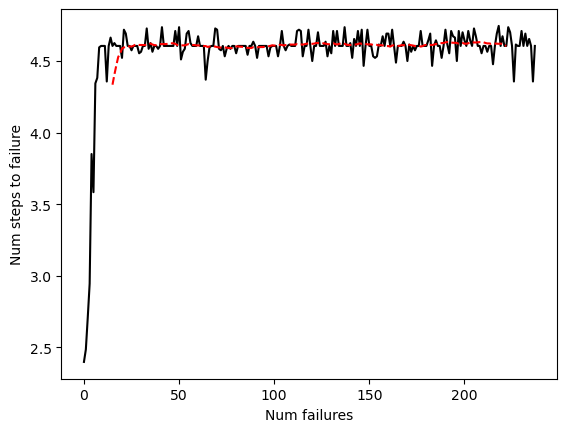

In [13]:
 
value_function_array = np.random.uniform(0, 0.1, NUM_STATES)
states_reward = np.zeros(NUM_STATES)
transition_matrix = np.zeros(shape=(NUM_STATES, NUM_ACTIONS, NUM_STATES)) + 1 / NUM_STATES


counter_state_action = np.zeros(shape=(NUM_STATES, NUM_ACTIONS))
counter_state_action_next_state = np.zeros(shape=(NUM_STATES, NUM_ACTIONS, NUM_STATES))
counter_state_for_reward = np.zeros(NUM_STATES)
sum_of_rewards_per_state = np.zeros(NUM_STATES)

# This is the criterion to end the simulation.
# You should change it to terminate when the previous
# 'NO_LEARNING_THRESHOLD' consecutive value function computations all
# converged within one value function iteration. Intuitively, it seems
# like there will be little learning after this, so end the simulation
# here, and say the overall algorithm has converged.
consecutive_no_learning_trials = 0

while consecutive_no_learning_trials < NO_LEARNING_THRESHOLD:

    # Write code to choose action (0 or 1).
    # This action choice algorithm is just for illustration. It may
    # convince you that reinforcement learning is nice for control
    # problems!Replace it with your code to choose an action that is
    # optimal according to the current value function, and the current MDP
    # model.
    sum_for_action_0 = np.dot(transition_matrix[state][0], value_function_array)
    sum_for_action_1 = np.dot(transition_matrix[state][1], value_function_array)
    action = 0 if sum_for_action_0 > sum_for_action_1 else 1

    # Get the next state by simulating the dynamics
    state_tuple = cart_pole.simulate(action, state_tuple)
    # x, x_dot, theta, theta_dot = state_tuple

    # Increment simulation time
    time = time + 1

    # Get the state number corresponding to new state vector
    new_state = cart_pole.get_state(state_tuple)
    # if display_started == 1:
    #     cart_pole.show_cart(state_tuple, pause_time)

    # reward function to use - do not change this!
    if new_state == NUM_STATES - 1:
        R = -1
    else:
        R = 0

    # Perform model updates here.
    # A transition from `state` to `new_state` has just been made using
    # `action`. The reward observed in `new_state` (note) is `R`.
    # Write code to update your statistics about the MDP i.e. the
    # information you are storing on the transitions and on the rewards
    # observed. Do not change the actual MDP parameters, except when the
    # pole falls (the next if block)!
    counter_state_action[state, action] += 1
    counter_state_action_next_state[state, action, new_state] += 1
    counter_state_for_reward[new_state] += 1
    sum_of_rewards_per_state[new_state] += R
    # raise NotImplementedError('Update T and R not implemented')
    # record the number of times `state, action, new_state` occurs
    # record the rewards for every `new_state`
    # record the number of time `new_state` was reached

    # Recompute MDP model whenever pole falls
    # Compute the value function V for the new model
    if new_state == NUM_STATES - 1:
        # Update MDP model using the current accumulated statistics about the
        # MDP - transitions and rewards.
        # Make sure you account for the case when a state-action pair has never
        # been tried before, or the state has never been visited before. In that
        # case, you must not change that component (and thus keep it at the
        # initialized uniform distribution).
        for i in range(NUM_STATES):
            for a in range(NUM_ACTIONS):
                if counter_state_action[i][a] != 0:
                    transition_matrix[i][a] = counter_state_action_next_state[i][a] / counter_state_action[i][a]
            if counter_state_for_reward[i] != 0:
                states_reward[i] = sum_of_rewards_per_state[i] / counter_state_for_reward[i]

        # Perform value iteration using the new estimated model for the MDP.
        # The convergence criterion should be based on `TOLERANCE` as described
        # at the top of the file.
        # If it converges within one iteration, you may want to update your
        # variable that checks when the whole simulation must end.
        next_iter_value_function_array = np.zeros(NUM_STATES)
        number_of_iteration_till_converge = 0
        while True:
            for i in range(NUM_STATES):
                sum_for_action_0 = np.dot(transition_matrix[i][0], value_function_array)
                sum_for_action_1 = np.dot(transition_matrix[i][1], value_function_array)
                next_iter_value_function_array[i] = states_reward[i] + GAMMA * (
                    sum_for_action_0 if sum_for_action_0 > sum_for_action_1 else sum_for_action_1)
            if np.linalg.norm(value_function_array - next_iter_value_function_array, ord=np.inf) < TOLERANCE:
                if number_of_iteration_till_converge == 0:
                    consecutive_no_learning_trials += 1
                else:
                    consecutive_no_learning_trials = 0
                value_function_array = next_iter_value_function_array
                break
            else:
                number_of_iteration_till_converge += 1
                value_function_array = next_iter_value_function_array

    # Do NOT change this code: Controls the simulation, and handles the case
    # when the pole fell and the state must be reinitialized.
    if new_state == NUM_STATES - 1:
        num_failures += 1
        if num_failures >= max_failures:
            break
        print('[INFO] Failure number {}'.format(num_failures))
        time_steps_to_failure.append(time - time_at_start_of_current_trial)
        # time_steps_to_failure[num_failures] = time - time_at_start_of_current_trial
        time_at_start_of_current_trial = time

        if time_steps_to_failure[num_failures - 1] > min_trial_length_to_start_display:
            display_started = 1

        # Reinitialize state
        # x = 0.0
        x = -1.1 + np.random.uniform() * 2.2
        x_dot, theta, theta_dot = 0.0, 0.0, 0.0
        state_tuple = (x, x_dot, theta, theta_dot)
        state = cart_pole.get_state(state_tuple)
    else:
        state = new_state

# plot the learning curve (time balanced vs. trial)
log_tstf = np.log(np.array(time_steps_to_failure))
plt.plot(np.arange(len(time_steps_to_failure)), log_tstf, 'k')
window = 30
w = np.array([1 / window for _ in range(window)])
weights = lfilter(w, 1, log_tstf)
x = np.arange(window // 2, len(log_tstf) - window // 2)
plt.plot(x, weights[window:len(log_tstf)], 'r--')
plt.xlabel('Num failures')
plt.ylabel('Num steps to failure')
plt.show()


# Frozen Lake

## Tabular Q Learning

In [21]:
! pip install gymnasium
! pip install tqdm
! pip install gymnasium[toy_text]

     ---------------------------------------- 10.6/10.6 MB 2.9 MB/s eta 0:00:00


In [4]:
import gymnasium as gym
import numpy as np
import random
from tqdm import tqdm

# Load environment
env = gym.make('FrozenLake-v1', render_mode="ansi")

# Implement Q-Table learning algorithm
# Initialize table with all zeros

# Set learning parameters
LEARNING_RATE = .8
GAMMA = .95
NUM_EPISODES = 4000

Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_list = []
for episode_number in tqdm(range(NUM_EPISODES)):
    # Reset environment and get first new observation
    state = env.reset()[0]
    total_episode_reward = 0  # Total reward during current episode
    terminated = False
    t = 0
    # The Q-Table learning algorithm
    while t < 99:
        t += 1
        action = np.argmax(Q[state] + np.random.normal(0, 0.01, size=Q.shape[1]))
        next_state, reward, terminated, truncated, info = env.step(action)
        CAPITAL_GAMMA = reward + GAMMA * np.max(Q[next_state]) - Q[state][action]
        Q[state][action] = Q[state][action] + LEARNING_RATE * CAPITAL_GAMMA
        total_episode_reward += reward
        if terminated or truncated:
            break
        state = next_state

    rewards_list.append(total_episode_reward)


# a Final round to show the actual results
for try_count in tqdm(range(10)):
    print(f"new game. try: {try_count+1}")
    # Re Load environment with human render mode to save in runtime
    env = gym.make('FrozenLake-v1', render_mode="human")
    state = env.reset()[0]
    terminated, truncated = False, False
    t = 0
    while t < 99:
        t += 1
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        # if next_state != state:
        #     # print(env.render())
        #     env.render()
        state = next_state
        if terminated or truncated:
            env.close()
            break
    if state == env.observation_space.n - 1:
        env.close()
        break


# Reports
print("Score over time: " + str(sum(rewards_list) / NUM_EPISODES))
print("Final Q-Table Values")
print(Q)


  0%|          | 0/10 [00:00<?, ?it/s]

new game. try: 1


 10%|█         | 1/10 [00:25<03:53, 25.90s/it]

new game. try: 2


 10%|█         | 1/10 [00:35<05:23, 35.96s/it]

Score over time: 0.4
Final Q-Table Values
[[2.36373283e-01 3.51932824e-02 2.88854757e-02 4.60522491e-02]
 [9.54735777e-04 1.65314640e-02 6.18991548e-04 2.31042878e-02]
 [2.20017282e-02 2.90299627e-03 6.24966025e-03 6.69509745e-02]
 [4.41477899e-03 3.49040863e-03 1.82017583e-02 2.09139328e-02]
 [2.11656415e-01 1.10866512e-04 2.39554450e-03 5.06900448e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.75958897e-04 1.38746649e-04 4.56228417e-03 3.36097408e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.17475361e-03 1.39068946e-02 1.11879779e-04 2.40474602e-01]
 [1.34057078e-03 2.55207813e-01 1.13432143e-02 2.94735932e-04]
 [5.39821502e-02 1.29709266e-03 1.07082431e-02 6.73636450e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.77635991e-03 2.40020648e-02 1.79457126e-01 0.00000000e+00]
 [7.65312880e-03 0.00000000e+00 7.63784530e-02 0.00000000e+00]
 [0.00000000e

## Deep Q-learning

In [9]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
from tqdm import tqdm
# sleep for 1 second
import time

# Load environment
env = gym.make('FrozenLake-v1', render_mode='ansi')


def get_one_hot(x, l):
    x = torch.LongTensor([[x]])
    one_hot = torch.FloatTensor(1, l)  # initialize the one-hot tensor
    return one_hot.zero_().scatter_(1, x, 1)


num_classes = 4
input_size = 16

model = nn.Sequential(nn.Linear(input_size, num_classes, bias=False))

criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Implement Q-Network learning algorithm

# Set learning parameters
GAMMA = .99
epsilon = 0.4
NUM_EPISODES = 4000
NUM_STATES = 16
# create lists to contain total rewards and steps per episode
episodes_lengths_list = []
total_rewards_list = []
for i in tqdm(range(NUM_EPISODES)):
    # Reset environment and get first new observation
    state = env.reset()[0]
    rAll = 0
    terminated, truncated = False, False
    t = 0
    # The Q-Network
    while t < 99:
        t += 1

        Q = model(get_one_hot(state, NUM_STATES))

        action = torch.argmax(Q).item()
        if np.random.rand(1) < epsilon:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, info = env.step(action)

        Q_tag = model(get_one_hot(new_state, NUM_STATES))
        Q_target = Variable(Q.data)
        Q_target[0][action] = reward + torch.mul(GAMMA, torch.max(Q_tag).item())
        Q = model(get_one_hot(state, NUM_STATES))

        loss = criterion(Q_target, Q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        rAll += reward
        state = new_state
        if terminated or truncated:
            # Reduce chance of random action as we train the model.
            epsilon = 1. / ((i / 50) + 10)
            break
    episodes_lengths_list.append(t)
    total_rewards_list.append(rAll)


# A final round to see the network's results in action
model.eval()
for try_count in range(10):
    print(f"new game. try: {try_count+1}")
    # Load environment
    env = gym.make('FrozenLake-v1', render_mode='human')
    state = env.reset()[0]
    terminated, truncated = False, False
    t = 0
    while t < 99:
        t += 1
        Q = model(get_one_hot(state, NUM_STATES))
        action = torch.argmax(Q).item()
        new_state, reward, terminated, truncated, info = env.step(action)
        # if new_state != state:
        #     print(env.render())
        state = new_state
        if terminated or truncated:
            env.close()
            break
    if state == env.observation_space.n - 1:
        break


# Reports
print("Score over time: " + str(sum(total_rewards_list) / NUM_EPISODES))
time.sleep(5)
env.close()

100%|██████████| 4000/4000 [00:30<00:00, 131.82it/s]


new game. try: 1
Score over time: 0.4835
